In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import matplotlib.colors as colors

In [2]:
# read data - (Miocene exp. with PI-aerosols)

path = '/scratch/pchen25/clim680_dataset/MidMiocene/atm/'
file_name = 'B.MMIOx2_C5_280_WISOon_ANN_concat.nc'
ds = xr.open_dataset(path+file_name)

ds

<xarray.Dataset>
Dimensions:        (lev: 30, ilev: 31, time: 12, lat: 96, lon: 144, slat: 95, slon: 144, nbnd: 2)
Coordinates:
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time           (time) object 1949-08-02 12:00:00 ... 1950-07-02 12:00:00
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Dimensions without coordinates: nbnd
Data variables: (12/211)
    hyam           (lev) float64 ...
    hybm           (lev) float64 ...
    hyai           (ilev) float64 ...
    hybi           (ilev) float64 ...
    P0             float64 ...
    date           (time) int32 ...
    ...             ...
    pom_a1_SRF     (time, lat, lon) float32 ...
    so4_a1_SRF     (time, lat, lon) float32 ...
    so4_a2_SRF     (time, lat, lon) float32 ...
    so4_a3_SRF     (time, lat, lon) float32 ...
    soa_a1_SRF     (time, lat, lon) float32 ...
    soa_a2_SRF     (time, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             B.MMIOx2_C5_280_WISOon
    title:            UNSET
    logname:          pacosta
    host:             r8i0n31
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/scratch/pacosta/B.MMIOx2_C5_280_WISOon/run/B.MMI...
    topography_file:  /glade/work/pacosta/PaleoBC/heroldn/gx1vMIO/cami_bnd_to...
    history:          Mon Jun 26 07:11:31 2023: ncrcat -O B.MMIOx2_C5_280_WIS...
    NCO:              netCDF Operators version 5.1.4 (Homepage = http://nco.s...

In [3]:
# read variables

var = 'TS'
ts_PI = ds[var]

ts_PI

<xarray.DataArray 'TS' (time: 12, lat: 96, lon: 144)>
[165888 values with dtype=float32]
Coordinates:
  * time     (time) object 1949-08-02 12:00:00 ... 1950-07-02 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

In [4]:
# input mask

var = 'LANDFRAC'
mask = ds[var][0,:,:]

mask

<xarray.DataArray 'LANDFRAC' (lat: 96, lon: 144)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    time     object 1949-08-02 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         fraction
    long_name:     Fraction of sfc area covered by land
    cell_methods:  time: mean

In [5]:
# Add cyclic point to data
data = ts_PI
data, lons = add_cyclic_point(data, coord=ds['lon'])
mask, mask_lons = add_cyclic_point(mask, coord=ds['lon'])


month = ['Jan','Feb','Mar','Apr',
         'May','Jun','Jul','Aug',
         'Sep','Oct','Nov','Dec']

In [6]:
def multipanel(data, plot_title, lev_min, lev_max, interval, cmap, divnorm):
    
    # Define the figure and each axis for the 4 rows and 3 columns
    fig, axs = plt.subplots(nrows=4,ncols=3,
                            subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},
                            figsize=(11,9))
    
    # Set Width / Height padding between subplots, expressed as a fraction of the subplot width
    fig.subplots_adjust(wspace=0.25, hspace=0.35) 
    
    # axs is a 2 dimensional array of `GeoAxes`
    # flatten it into a 1-D array
    axs=axs.flatten()
    
    # Loop over all of the months and plot
    for i,m in enumerate(ds['time']):
        
        # Contour plot
        cs=axs[i].contourf(lons,ds['lat'],data[i,:,:], levels = np.linspace(lev_min, lev_max, interval),
                          transform = ccrs.PlateCarree(),
                          cmap=cmap, norm=divnorm, extend='both')

        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()  
        axs[i].xaxis.set_major_formatter(lon_formatter)  # set the format of xticks_label
        axs[i].tick_params(axis='y', size=2)             # set xtick parameters
        for xlabel in axs[i].get_xticklabels():          # set xticks_label
            xlabel.set_fontsize(9)        

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)  # set the format of yticks_label
        axs[i].tick_params(axis='y', size=2)             # set ytick parameters
        for ylabel in axs[i].get_yticklabels():          # set yticks_label
            ylabel.set_fontsize(9)        
        
        # Add coastines in Miocene Scenario
        axs[i].contour(lons, ds['lat'], mask, [0.5,1.5],
                   transform = ccrs.PlateCarree(),
                   colors='k', linewidths=1.5, zorder=3)
        
        # Title each subplot with the name of the month
        axs[i].set_title(month[i])
        
        
        # Add gridlines
        axs[i].gridlines(zorder=2)
        
    # Add colorbar
    cax  = fig.add_axes([0.92, 0.2, 0.01, 0.6])    # set the [x0, y0, width, height] of the colorbar
    CB   = plt.colorbar(cs, cax = cax)
    
    # Add colobar's title
    plt.figtext(0.93,0.83,'[K]',ha='center',fontsize=15)
    # Add title
    plt.suptitle(plot_title, y=0.93, fontsize=18)
;

''

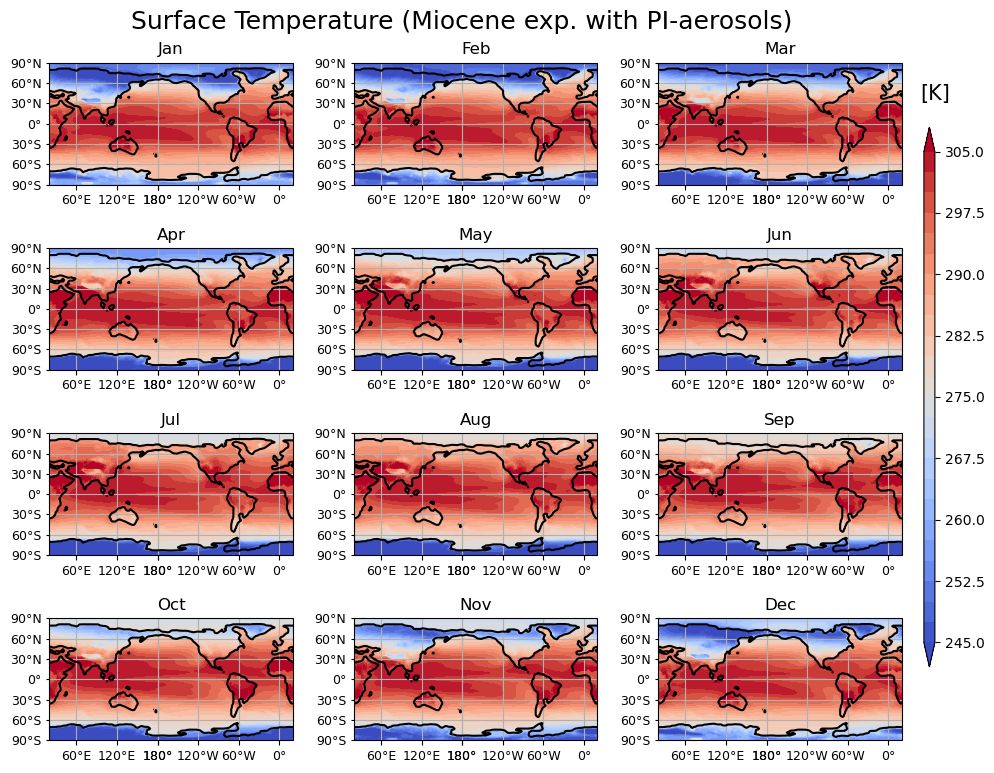

In [7]:
divnorm = colors.CenteredNorm(vcenter=275)
cmap = 'coolwarm'
multipanel(data, 'Surface Temperature (Miocene exp. with PI-aerosols)', 245, 305, 25, cmap, divnorm)

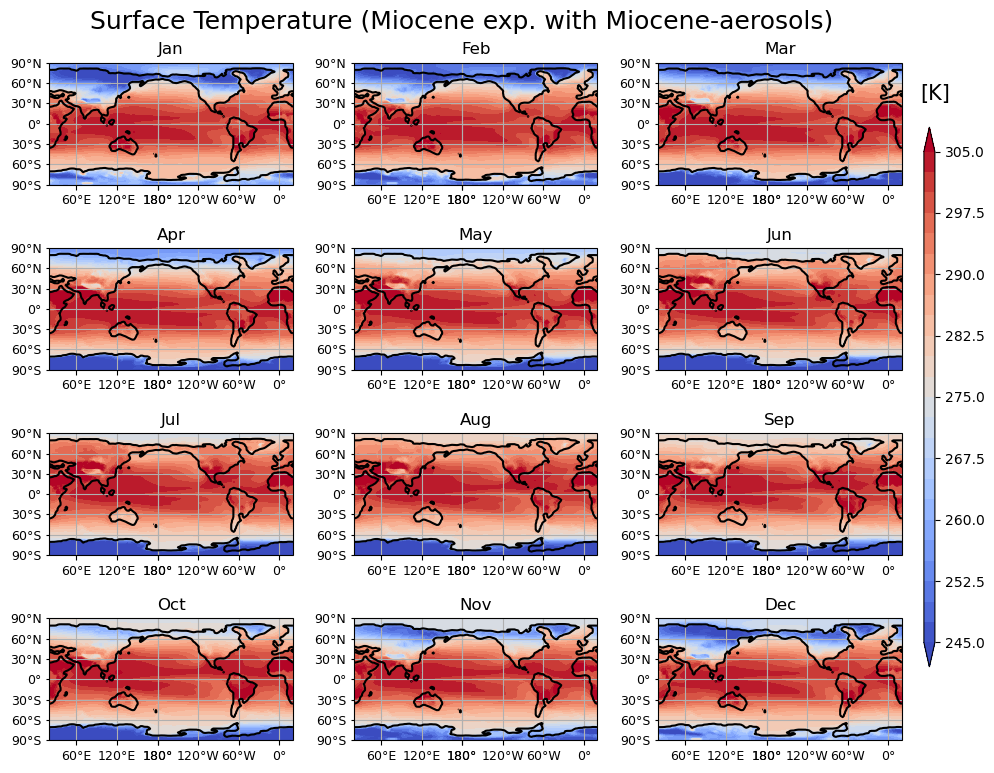

In [8]:
# read data - (Miocene exp. with Miocene-aerosols)

path = '/scratch/pchen25/clim680_dataset/MidMiocene/atm/'
file_name = 'B.MMIOx2_C5_280_WISOon_aeroZonal_ANN_concat.nc'
ds = xr.open_dataset(path+file_name)
var = 'TS'
ts_Mio = ds[var]

# Add cyclic point to data
data = ts_Mio
data, lons = add_cyclic_point(data, coord=ds['lon'])

# plot
divnorm = colors.CenteredNorm(vcenter=275)
cmap = 'coolwarm'
multipanel(data, 'Surface Temperature (Miocene exp. with Miocene-aerosols)', 245, 305, 25, cmap, divnorm)

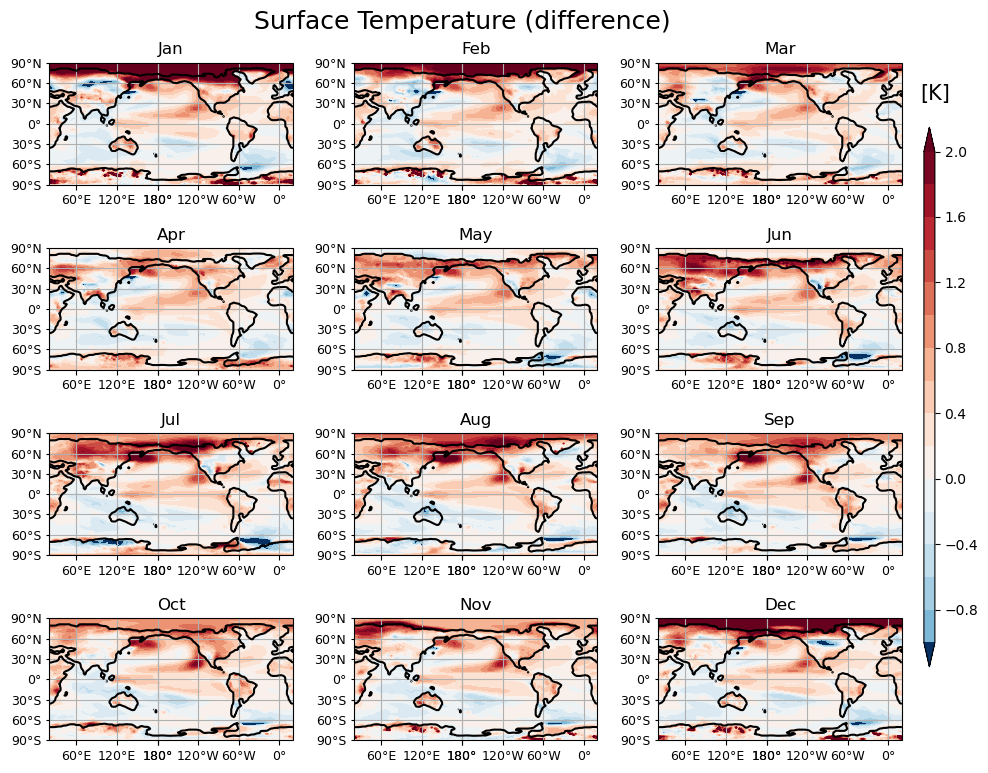

In [9]:
ts_diff = ts_Mio.copy()

for t in range(12):
    ts_diff[t,:,:] = ts_Mio[t,:,:] - ts_PI[t,:,:]


# Add cyclic point to data
data = ts_diff
data, lons = add_cyclic_point(data, coord=ds['lon'])

# plot
divnorm = colors.CenteredNorm(vcenter=0)
cmap = 'RdBu_r'
multipanel(data, 'Surface Temperature (difference)', -1, 2, 16, cmap, divnorm)